In [3]:
import pandas as pd
import pathlib as pl

In [13]:
data_dir = pl.Path('statements')
amex_dir = data_dir / 'amex'
amex_files = list(amex_dir.glob('*.csv'))

In [30]:
amex_df = pd.concat(
    [pd.read_csv(file, parse_dates=['Date']) for file in amex_files],
)
amex_df['Month'] = amex_df['Date'].dt.to_period('M')
amex_df['Category_1'] = amex_df['Category'].str.split('-').str[0]
amex_df['Category_2'] = amex_df['Category'].str.split('-').str[1]
amex_df = amex_df[amex_df['Amount'] > 0]

In [31]:
amex_df.groupby('Month').agg(
    Total=('Amount', 'sum'),
    Count=('Amount', 'size'),
    Average=('Amount', 'mean'),
)

,Total,Count,Average
Month,,,
2024-12,1168.59,22,53.117727
2025-01,1178.47,10,117.847000
2025-02,4622.96,37,124.944865
2025-03,1141.21,23,49.617826
2025-04,5597.11,106,52.802925
2025-05,1875.40,56,33.489286
2025-06,556.32,10,55.632000
2025-07,4094.07,71,57.662958
2025-08,642.28,12,53.523333


<Axes: xlabel='Month'>

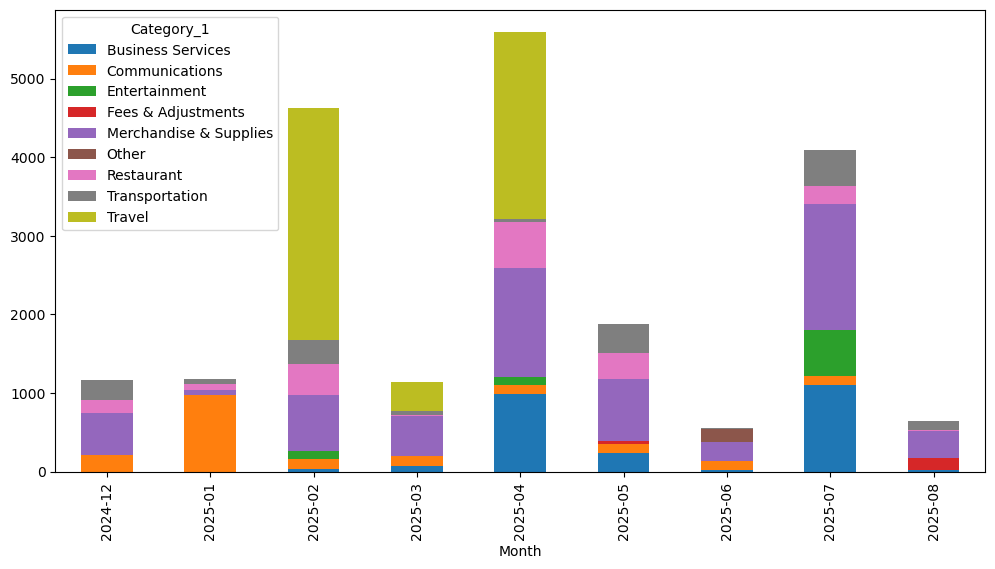

In [32]:
amex_df.groupby(['Month', 'Category_1'])['Amount'].sum().unstack(fill_value=0).plot(
    kind='bar', stacked=True, figsize=(12,6)
)

In [34]:
import plotly.express as px

fig_treemap = px.treemap(
    july_df,
    path=['Category_1', 'Category_2', 'Appears On Your Statement As'],
    values='Amount',
    color='Category_1',
    hover_data=['Amount', 'Description', 'Date'],
    title="July 2025 Spending Treemap by Category"
)
fig_treemap.show()